## Zeno zonal statistics
Testing for the GEE driven agents

In [84]:
import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize(project='ee-wri-lcl-zeno')

def print_meta(layer):
    # Get all metadata as a dictionary
    metadata = layer.getInfo()

    # Print metadata
    print("Image Metadata:")
    for key, value in metadata.items():
        print(f"{key}: {value}")

### GDAM data
For finding boundaries

In [59]:
import geopandas as gpd
gadm = gpd.read_file("/Users/tam/Downloads/gadm_410.gpkg")

### Natural lands
As reference land cover statistics

In [85]:
natural_lands = ee.Image("WRI/SBTN/naturalLands/v1/2020").select("classification")
print_meta(natural_lands)

Image Metadata:
type: Image
bands: [{'id': 'classification', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}, 'dimensions': [1439601, 540001], 'crs': 'EPSG:4326', 'crs_transform': [0.00025, 0, -179.9, 0, -0.00025, 75]}]
version: 1725397479424399
id: WRI/SBTN/naturalLands/v1/2020
properties: {'system:time_start': 1577836800000, 'classification_class_values': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], 'natural_class_values': [0, 1], 'system:footprint': {'type': 'LinearRing', 'coordinates': [[-180, -90], [180, -90], [180, 90], [-180, 90], [-180, -90]]}, 'system:time_end': 1609459200000, 'natural_class_palette': ['969696', 'A8DDB5'], 'system:asset_size': 20189186972, 'classification_class_palette': ['246E24', 'B9B91E', '6BAED6', '06A285', 'FEFECC', 'ACD1E8', '589558', '093D09', 'DBDB7B', '99991A', 'D3D3D3', 'D3D3D3', 'D3D3D3', 'D3D3D3', 'D3D3D3', 'D3D3D3', 'D3D3D3', 'D3D3D3', 'D3D3D3', 'D3D3D3'], 'system:index': '2020'}


### MODIS landcover
As an alternative classification source.

In [86]:
# Load MODIS land cover categories in 2001.
# Select the IGBP classification band.
modis_landcover = ee.Image('MODIS/051/MCD12Q1/2001_01_01').select('Land_Cover_Type_1')

print_meta(modis_landcover)

Image Metadata:
type: Image
bands: [{'id': 'Land_Cover_Type_1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}, 'dimensions': [86400, 43200], 'crs': 'SR-ORG:6974', 'crs_transform': [463.3127165279165, 0, -20015109.353988, 0, -463.3127165274999, 10007554.676994]}]
version: 1507158666650252
id: MODIS/051/MCD12Q1/2001_01_01
properties: {'Land_Cover_Type_4_class_names': ['Water', 'Evergreen Needleleaf vegetation', 'Evergreen Broadleaf vegetation', 'Deciduous Needleleaf vegetation', 'Deciduous Broadleaf vegetation', 'Annual Broadleaf vegetation', 'Annual grass vegetation', 'Non-vegetated land', 'Urban', 'Unclassified'], 'Land_Cover_Type_5_class_names': ['Water', 'Evergreen Needleleaf trees', 'Evergreen Broadleaf trees', 'Deciduous Needleleaf trees', 'Deciduous Broadleaf trees', 'Shrub', 'Grass', 'Cereal crops', 'Broad-leaf crops', 'Urban and built-up', 'Snow and ice', 'Barren or sparse vegetation', 'Unclassified'], 'Land_Cover_Type_1_class_palette': ['aec3d6', 

### DIST Alerts
For the alerts themselves

In [87]:
folder = "projects/glad/HLSDIST/current"
# // var alt_folder = "projects/glad/HLSDIST/backend"
VEGDISTSTATUS = ee.ImageCollection(folder+"/VEG-DIST-STATUS").mosaic()
VEGDISTDATE = ee.ImageCollection(folder+"/VEG-DIST-DATE").mosaic()
VEGDISTDUR = ee.ImageCollection(folder+"/VEG-DIST-DUR").mosaic()
VEGANOMMAX = ee.ImageCollection(folder+"/VEG-ANOM-MAX").mosaic()
VEGDISTCONF = ee.ImageCollection(folder+"/VEG-DIST-CONF").mosaic()
VEGDISTCOUNT = ee.ImageCollection(folder+"/VEG-DIST-COUNT").mosaic()
VEGIND = ee.ImageCollection(folder+"/VEG-IND").mosaic()
VEGANOM = ee.ImageCollection(folder+"/VEG-ANOM").mosaic()
VEGHIST = ee.ImageCollection(folder+"/VEG-HIST").mosaic()
VEGLASTDATE = ee.ImageCollection(folder+"/VEG-LAST-DATE").mosaic()

GENDISTSTATUS = ee.ImageCollection(folder+"/GEN-DIST-STATUS").mosaic()
GENDISTDATE = ee.ImageCollection(folder+"/GEN-DIST-DATE").mosaic()
GENDISTDUR = ee.ImageCollection(folder+"/GEN-DIST-DUR").mosaic()
GENANOMMAX = ee.ImageCollection(folder+"/GEN-ANOM-MAX").mosaic()
GENDISTCONF = ee.ImageCollection(folder+"/GEN-DIST-CONF").mosaic()
GENDISTCOUNT = ee.ImageCollection(folder+"/GEN-DIST-COUNT").mosaic()
GENANOM = ee.ImageCollection(folder+"/GEN-ANOM").mosaic()
GENLASTDATE = ee.ImageCollection(folder+"/GEN-LAST-DATE").mosaic()

print_meta(VEGDISTSTATUS)

Image Metadata:
type: Image
bands: [{'id': 'b1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}]


### Select GADM area
This will come from the user eventually, now its a random GADM.

In [82]:
# coords = [ [ [ -51.655295485566938, -17.30184810997919 ], [ -50.318740205247444, -17.30184810997919 ], [ -50.402274910267408, -18.192884963525522 ], [ -51.525352611091435, -18.192884963525522 ], [ -51.655295485566938, -17.30184810997919 ] ] ]
coords = list(gadm.iloc[100].geometry.geoms[0].exterior.coords)
geom = ee.Geometry.Polygon(coords)
features = ee.FeatureCollection([ee.Feature(geom)])

### Create statistics
Compute statistics and vectorize

In [122]:
# privisional_50_or_better = VEGDISTSTATUS
provisional_50_or_better = ee.ImageCollection(folder+"/VEG-DIST-STATUS").mosaic().gte(5)#filter(ee.Filter.gte('b1', 5)).mosaic()

print_meta(provisional_50_or_better)

combo = provisional_50_or_better.addBands(natural_lands)

print_meta(combo)

zone_stats = combo.reduceRegions(
    collection=features,
    reducer=ee.Reducer.sum().group(groupField=1, groupName="classification"),
    scale=30,
).getInfo()

for feat in zone_stats["features"]:
    print(feat["properties"])

Image Metadata:
type: Image
bands: [{'id': 'b1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 1}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}]
Image Metadata:
type: Image
bands: [{'id': 'b1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 1}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'classification', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}, 'dimensions': [1439601, 540001], 'crs': 'EPSG:4326', 'crs_transform': [0.00025, 0, -179.9, 0, -0.00025, 75]}]
{'groups': [{'classification': 3, 'sum': 33}, {'classification': 4, 'sum': 0}, {'classification': 6, 'sum': 8}, {'classification': 10, 'sum': 0}, {'classification': 12, 'sum': 2465.4549019607844}, {'classification': 13, 'sum': 54}, {'classification': 15, 'sum': 1}, {'classification': 21, 'sum': 0}]}


### Create vectors from dist alerts
Extract vectorized mask

In [126]:
# Vectorize the masked classification
vectors = provisional_50_or_better.selfMask().reduceToVectors(
    geometryType='polygon',  # Create polygons
    reducer=ee.Reducer.countEvery(),  # Count all pixels in each polygon
    scale=30,  # Scale in meters (adjust based on dataset resolution)
    maxPixels=1e8,  # Adjust for larger areas
    geometry=features
)

# Print vectorized result metadata
print("Vectorized Features Metadata:")
print(vectors.getInfo())

gdf = gpd.GeoDataFrame.from_features(vectors.getInfo()['features'])

Vectorized Features Metadata:
{'type': 'FeatureCollection', 'columns': {'count': 'Long<0, 4294967295>', 'label': 'Byte<0, 1>', 'system:index': 'String'}, 'features': [{'type': 'Feature', 'geometry': {'geodesic': False, 'type': 'Polygon', 'coordinates': [[[64.53263439140773, 32.893161600962465], [64.53290388599295, 32.893161600962465], [64.53290388599295, 32.8934310955477], [64.53263439140773, 32.8934310955477], [64.53263439140773, 32.893161600962465]]]}, 'id': '+239458+122055', 'properties': {'count': 1, 'label': 1}}, {'type': 'Feature', 'geometry': {'geodesic': False, 'type': 'Polygon', 'coordinates': [[[64.5881502759663, 32.98155582491982], [64.58841977055154, 32.98155582491982], [64.58841977055154, 32.981825319505056], [64.5881502759663, 32.981825319505056], [64.5881502759663, 32.98155582491982]]]}, 'id': '+239664+122383', 'properties': {'count': 1, 'label': 1}}, {'type': 'Feature', 'geometry': {'geodesic': False, 'type': 'Polygon', 'coordinates': [[[64.59812157562003, 32.9667336227

<Axes: >

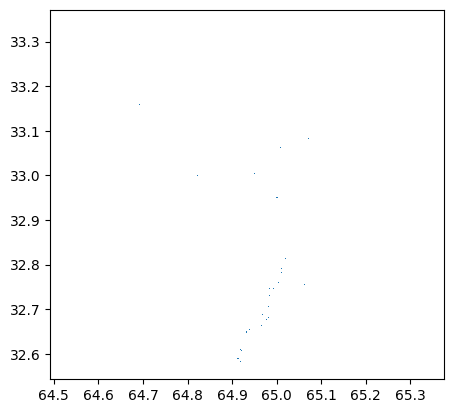

In [129]:
gdf.plot()